In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [15]:
from src.utils.preprocessing import *
from src.utils.variable_relationship import VariableRelationship
from src.models.KNN import KNNCLUSTERING
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from minepy import MINE

In [3]:
#Loading both data version cleaned
data_v1= pd.read_excel('../../data/cleaned_Ndist_v1.xlsx') 
data_v2= pd.read_excel('../../data/cleaned_Bplot_v2.xlsx') 

In [4]:
'''
Given that we are having a bimodal distribution in in_0, we perform KNN to identify the different subgroups or processes
'''
# Perform K-means clustering
knn=KNNCLUSTERING(data_v1,'in_0')
knn.KNN_clustering()

c:\Users\yassi\case_study\case_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             in_0          
             mean    median
Cluster                    
0       -0.918746 -0.761208
1        0.777508  0.763852


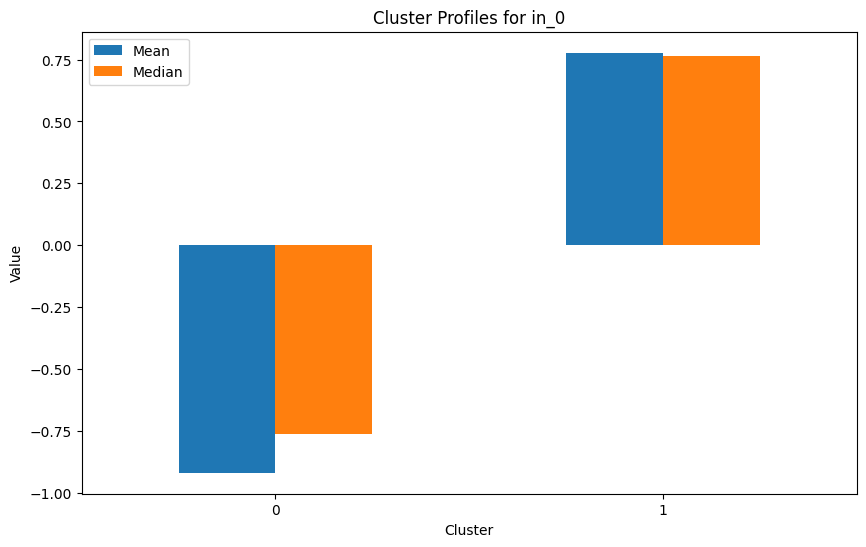

In [5]:
'''
Get the mean and the median in each cluster to see the difference between the central tendencies of each cluster
'''
# Get cluster profiles
knn.get_cluster_profiles()

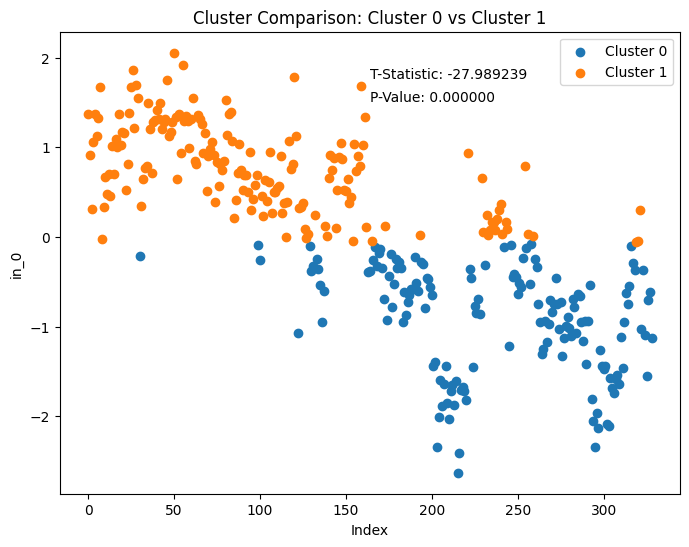

Cluster 0 vs Cluster 1
T-Statistic: -27.989238747807747
P-Value: 8.172610218582948e-89



In [6]:
'''
Perform Hypothesis testing to check if the clusters are actually different.
'''

# Perform hypothesis testing
knn.hypothesis_testing()

In [7]:
'''
Get the subpopulation if the p_value is very close to 0
'''

# Perform hypothesis testing
subpopulations=knn.get_subprocesses()

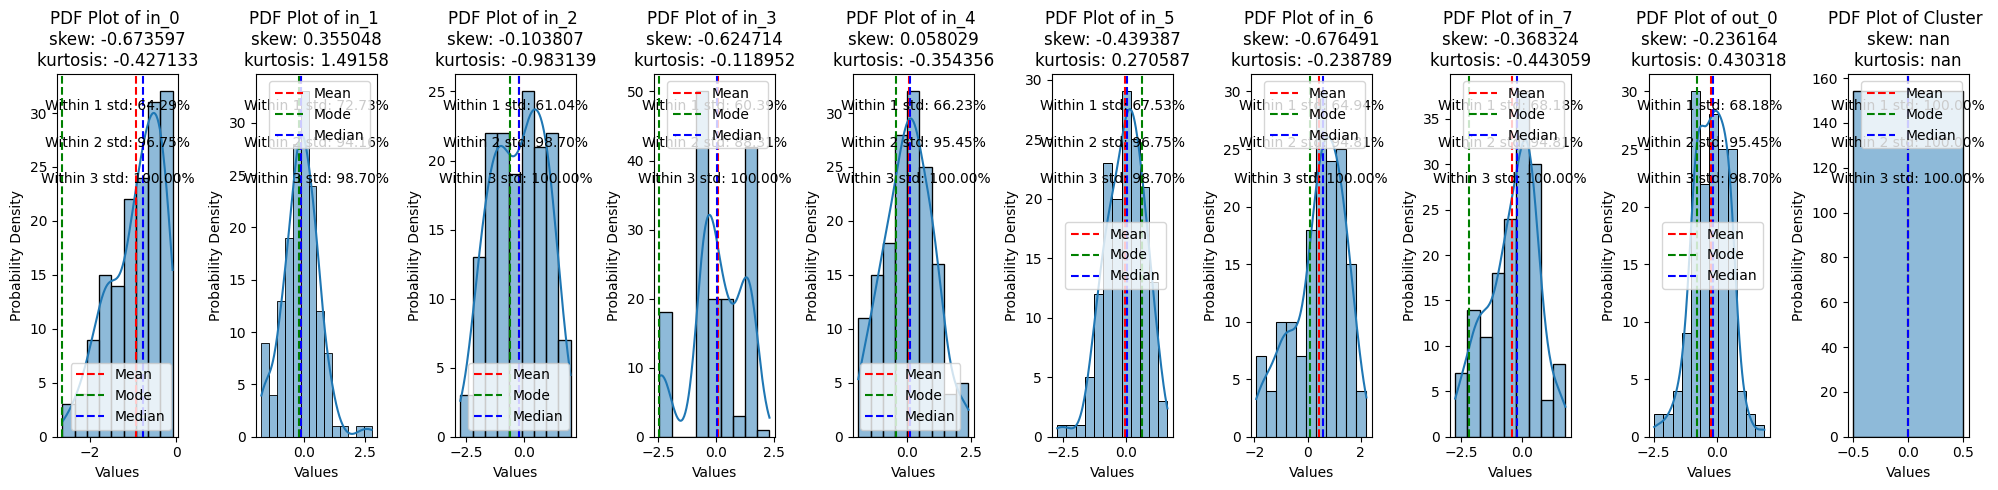

In [8]:
#Get the normal distribution of each subpopulation: subpopulation 0
get_normal_distribution(subpopulations[0])

c:\Users\yassi\case_study\src\utils\preprocessing.py:92: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  axs[i].set_title(f'PDF Plot of {col} ' "\n" f'skew: {round(skew(df[col]), 6)}' "\n" f'kurtosis: {round(kurtosis(df[col]), 6)}')


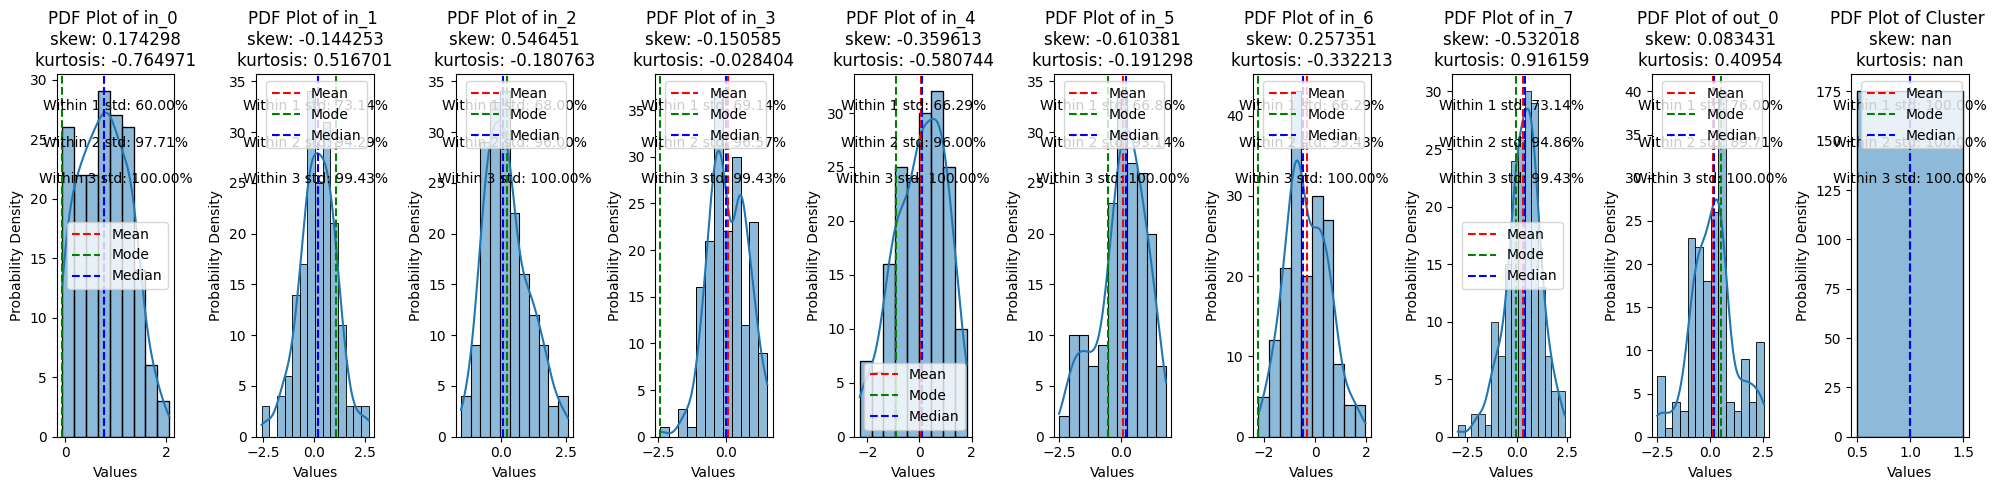

In [9]:
#get distribution of the second subpopulation: subpopulation 1
get_normal_distribution(subpopulations[1])

<Axes: >

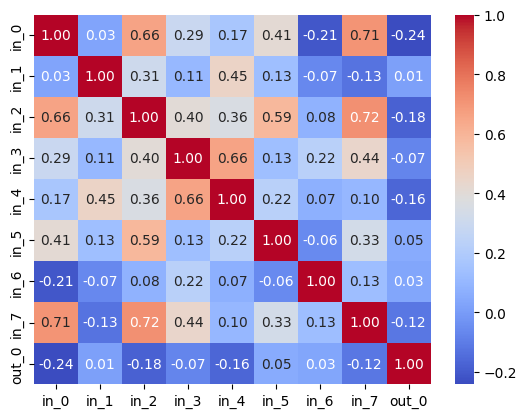

In [10]:
# Get the Linear corrolation between all our variables in both subpopulation
corr_matrix = subpopulations[0].drop(['ID','Cluster'],axis=1).corr()
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap='coolwarm')

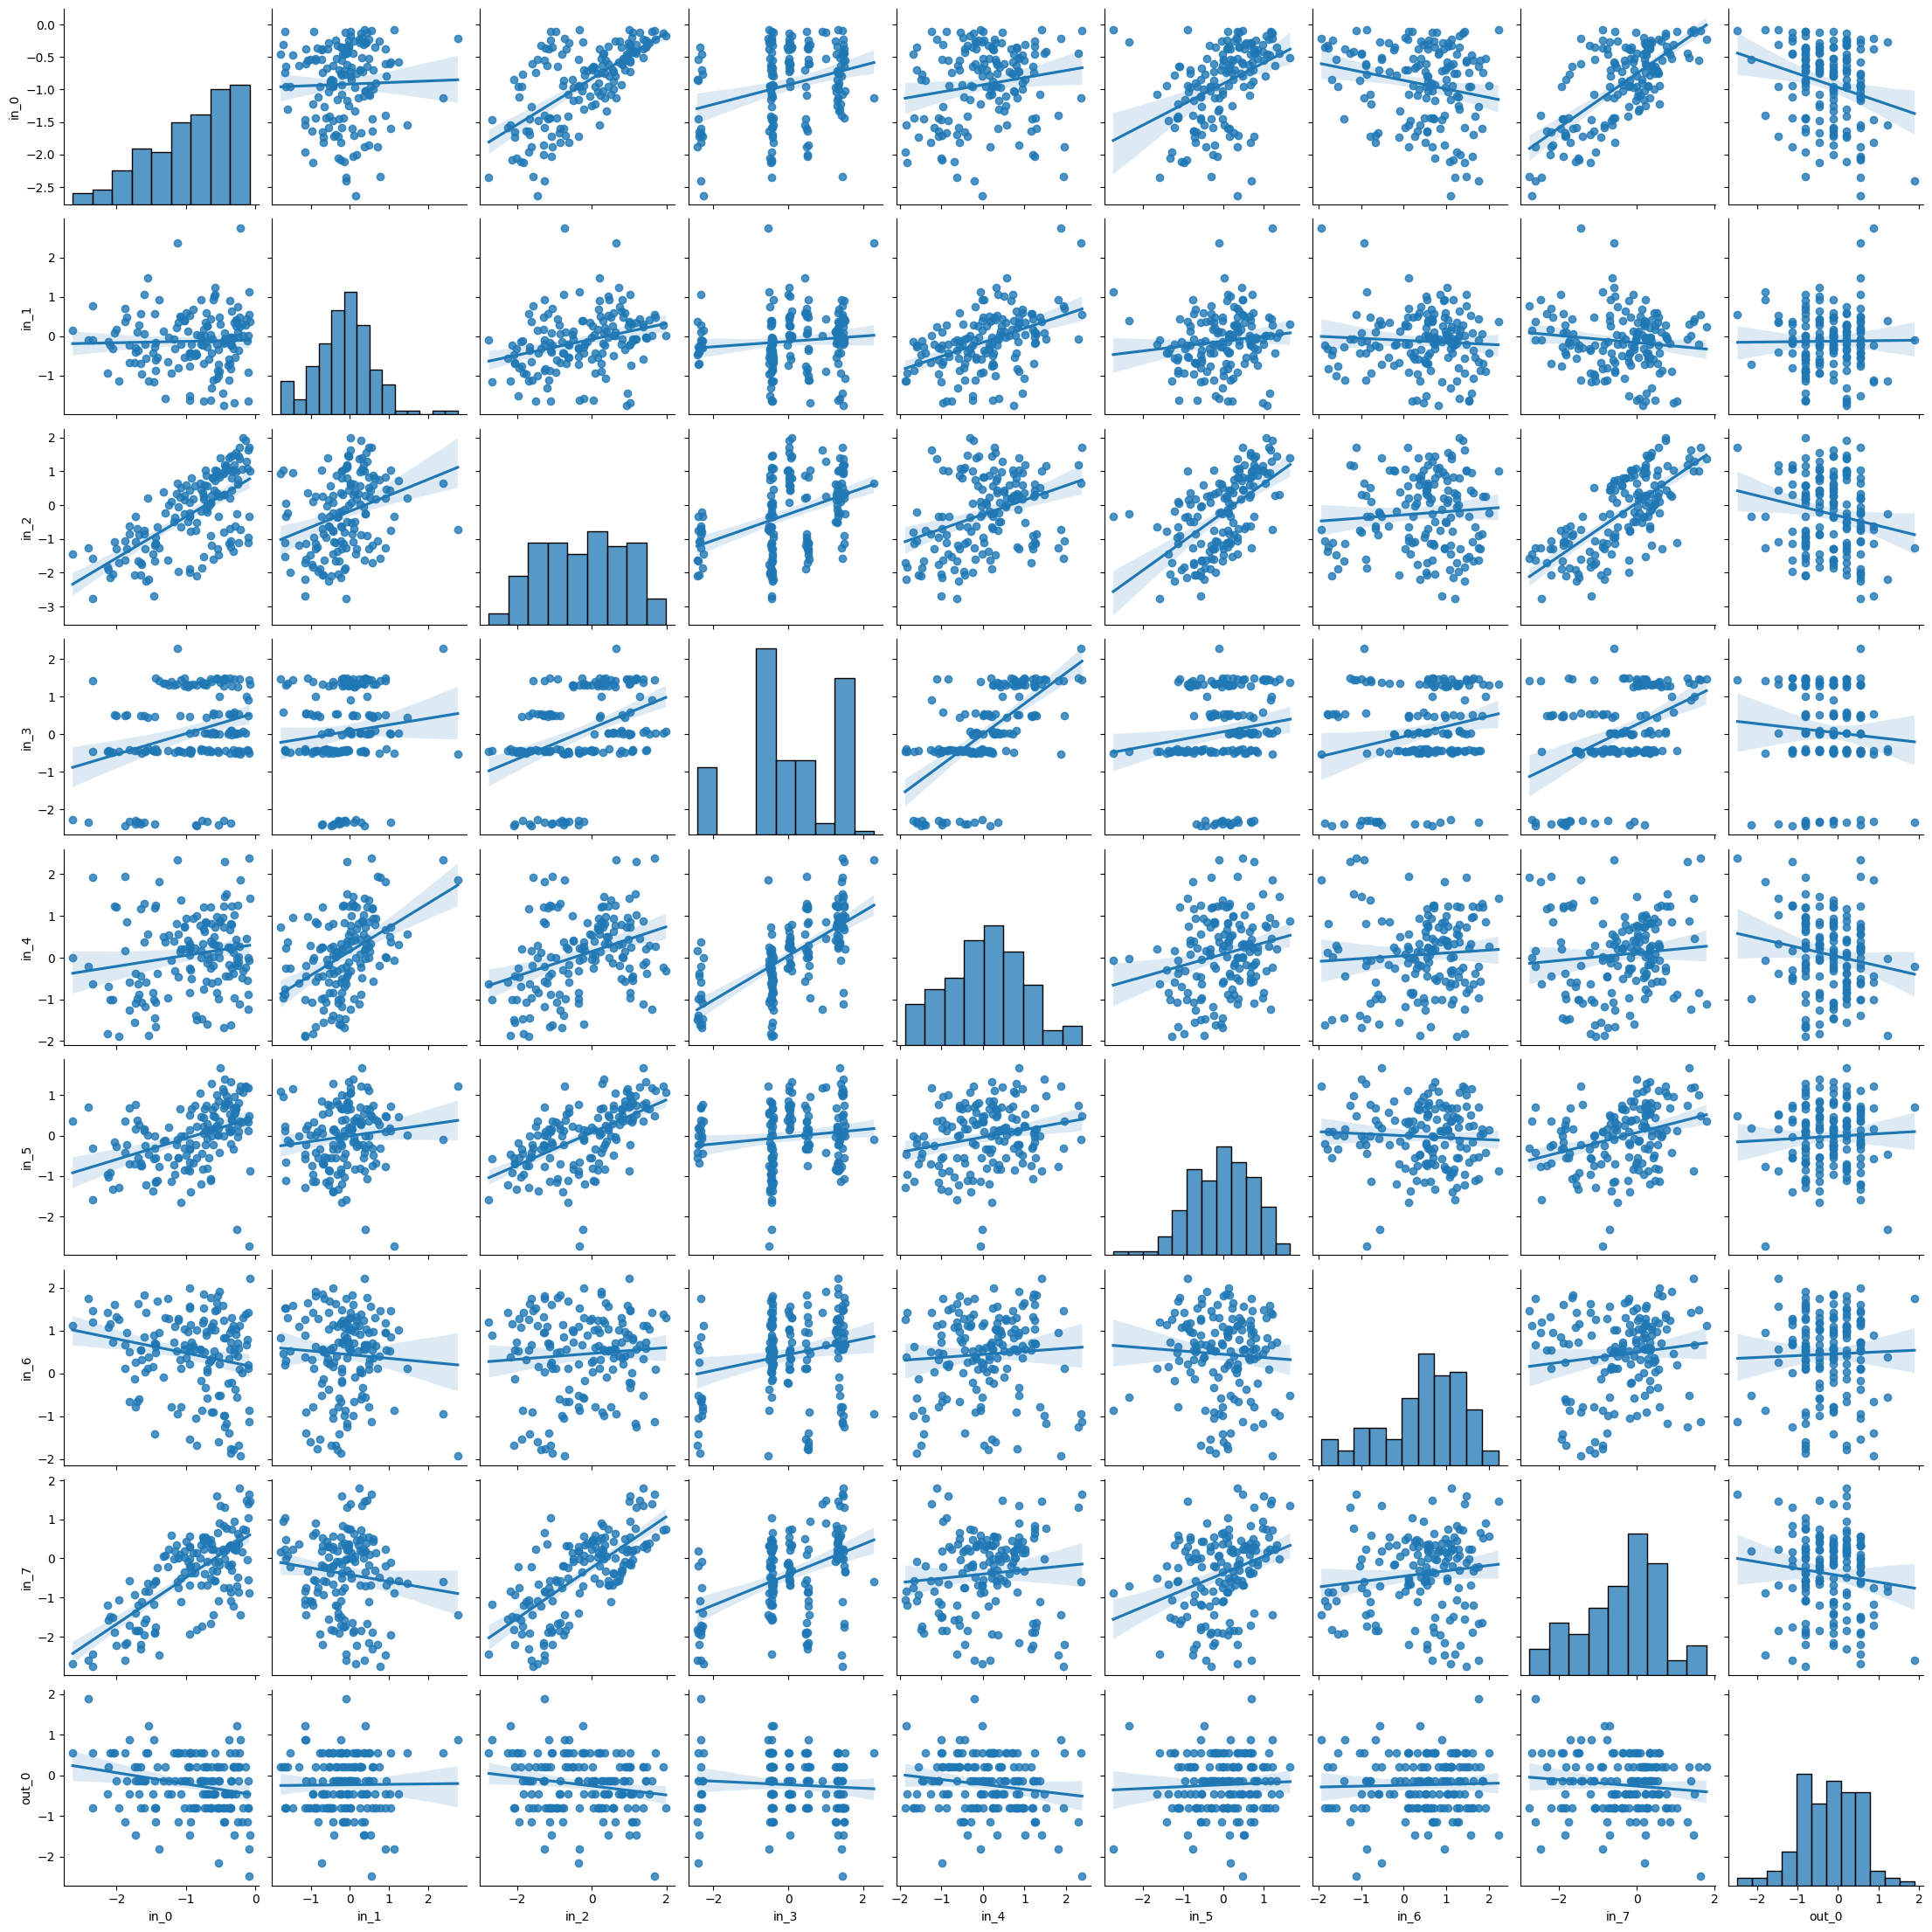

In [11]:
#Get the scatterplot relationship between the variables
sns.pairplot(subpopulations[0].drop(['ID','Cluster'],axis=1),kind='reg')

<Axes: >

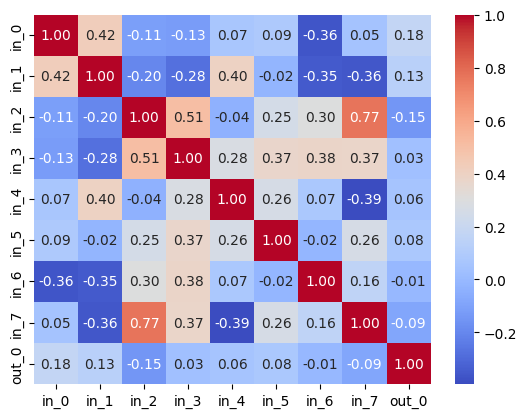

In [12]:
# Get the Linear corrolation between all our variables in both subpopulation
corr_matrix = subpopulations[1].drop(['ID','Cluster'],axis=1).corr()
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap='coolwarm')

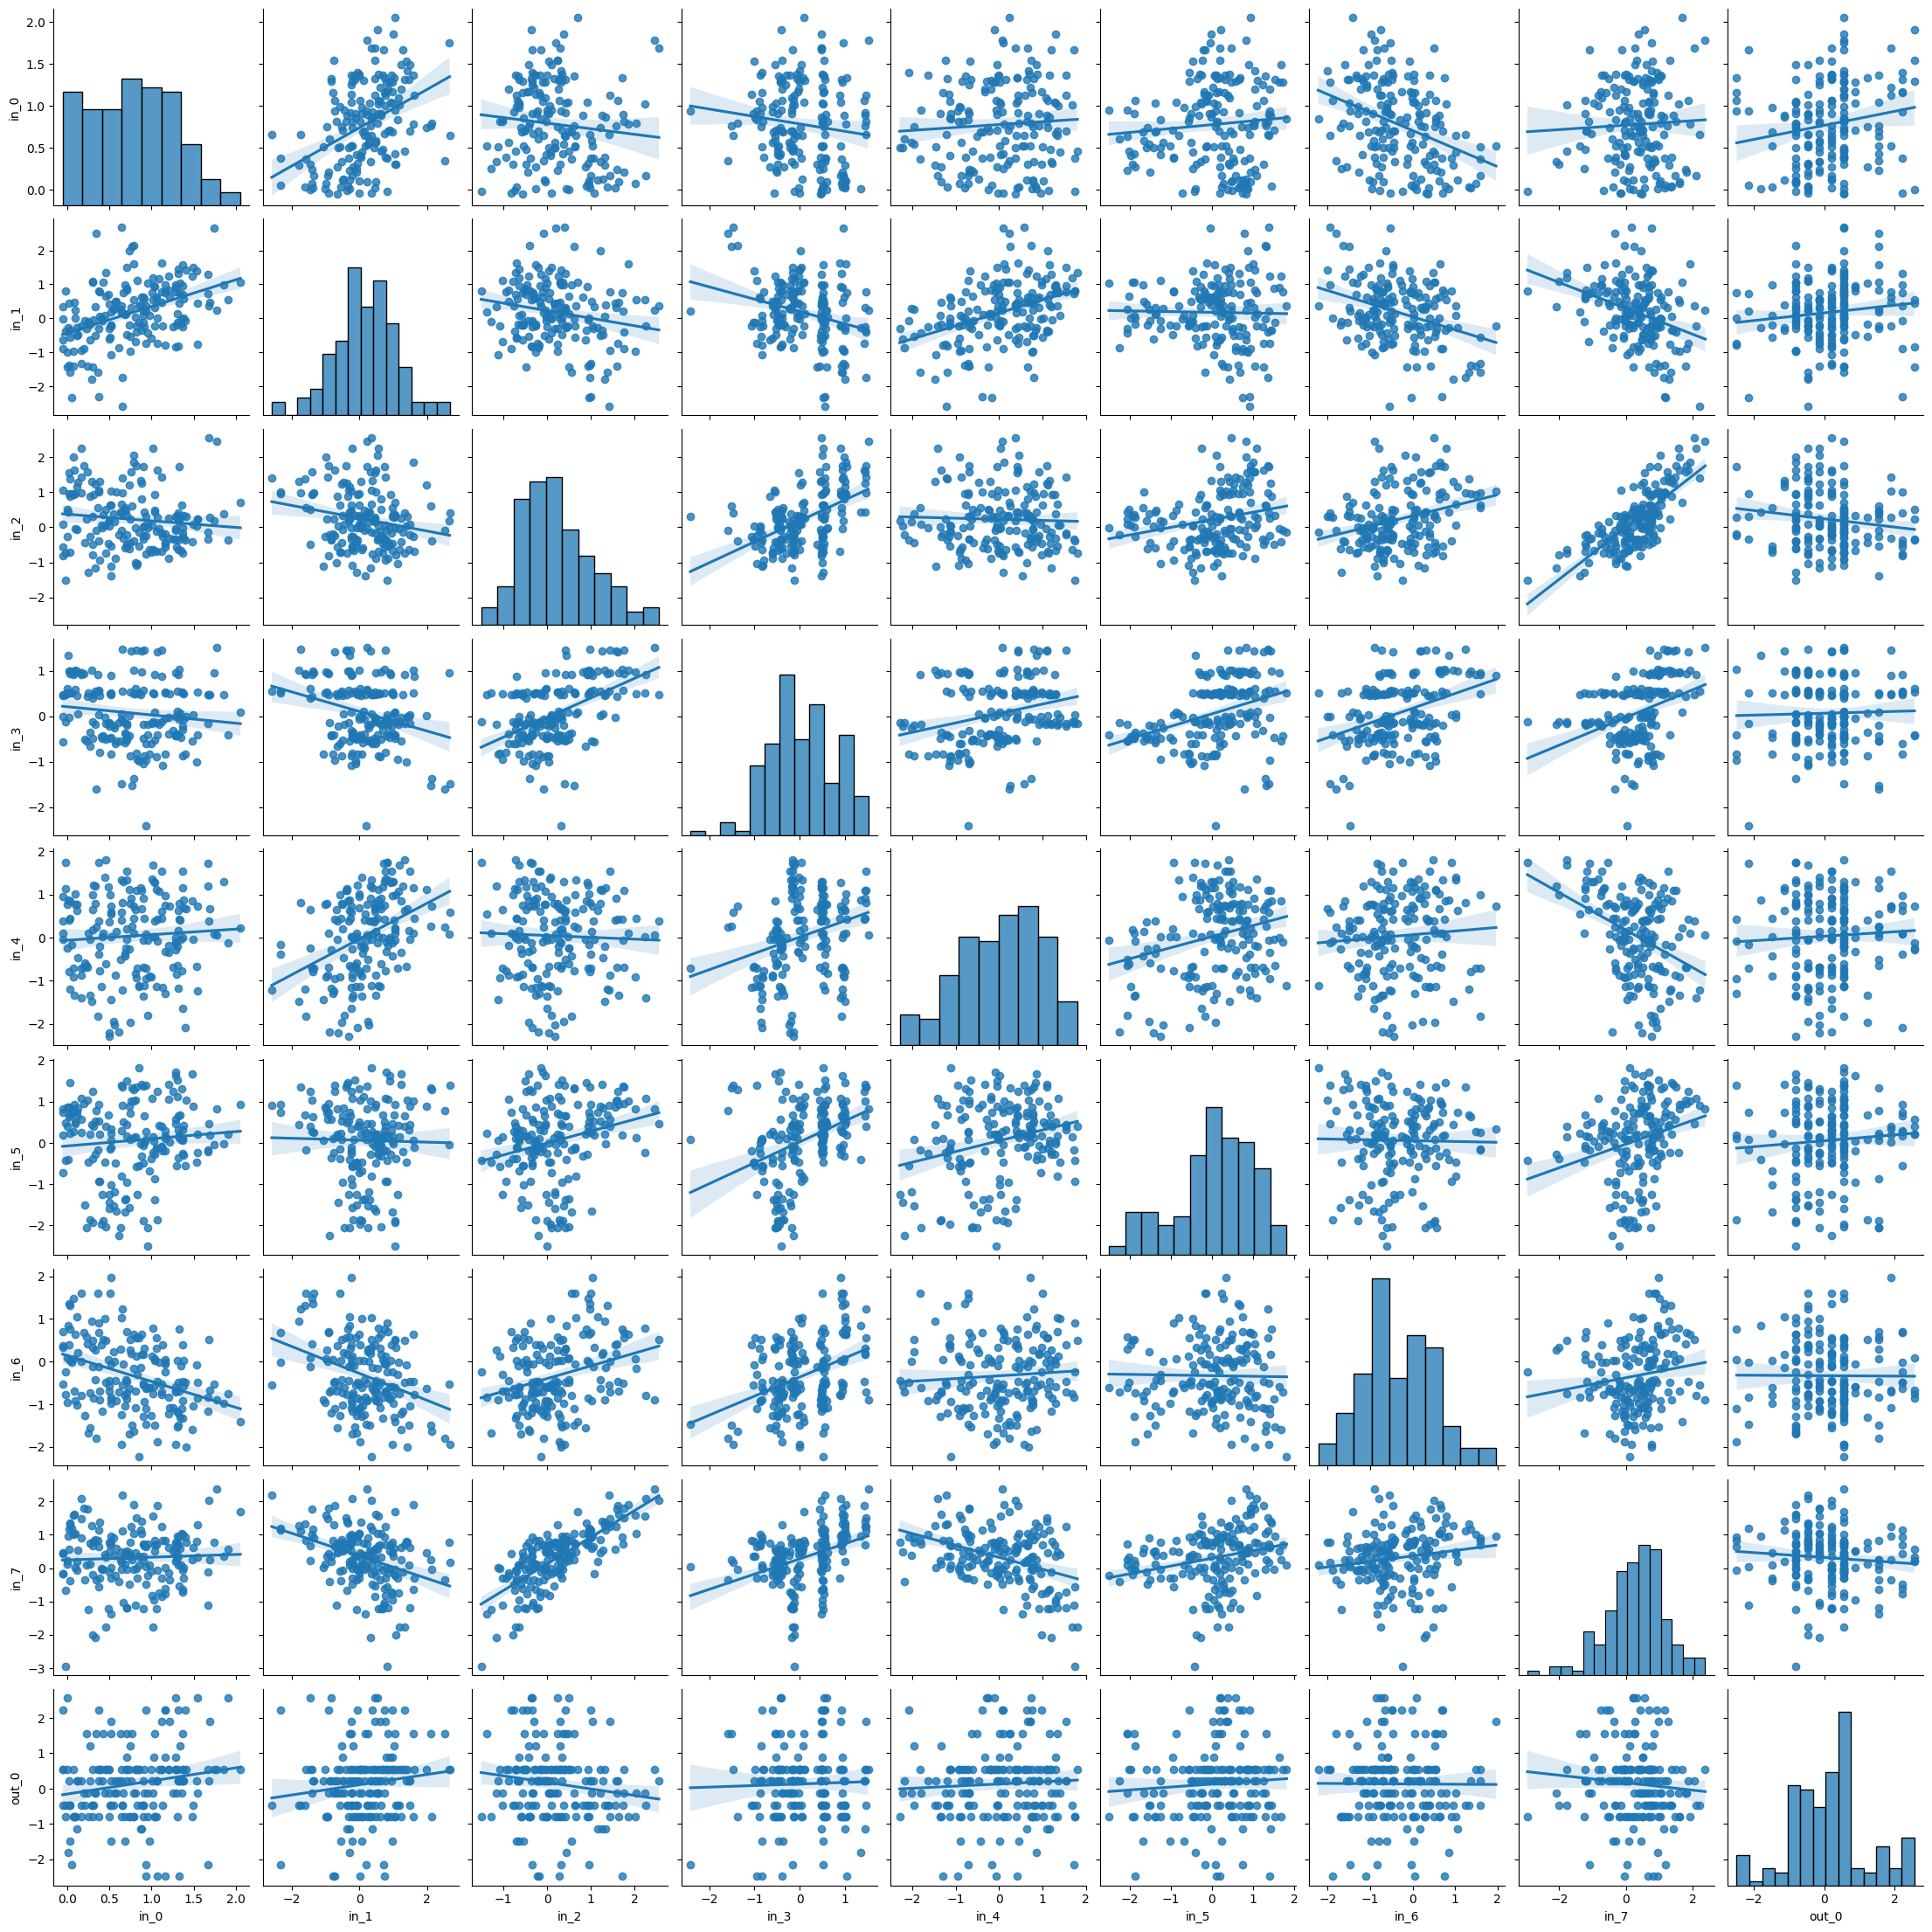

In [13]:
# Create scatterplots of subpopulation 1
sns.pairplot(subpopulations[1].drop(['ID','Cluster'],axis=1),kind='reg')

In [16]:
# Calculate MIC  to detect nonlinear relationship for pairs of variables
mic_matrix = pd.DataFrame(index=subpopulations[1].drop(['ID','Cluster'],axis=1).columns, columns=subpopulations[1].drop(['ID','Cluster'],axis=1).columns)

for col1 in subpopulations[1].drop(['ID','Cluster'],axis=1).columns:
    for col2 in subpopulations[1].drop(['ID','Cluster'],axis=1).columns:
        mine = MINE()
        mine.compute_score(subpopulations[1].drop(['ID','Cluster'],axis=1)[col1], subpopulations[1].drop(['ID','Cluster'],axis=1)[col2])
        mic = mine.mic()
        mic_matrix.loc[col1, col2] = mic

# Display the MIC matrix
print("MIC Matrix:")
mic_matrix

MIC Matrix:


,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,out_0
in_0,0.999976,0.375551,0.275269,0.335784,0.254374,0.312362,0.28578,0.175554,0.257123
in_1,0.375551,0.999976,0.279757,0.282279,0.299555,0.241105,0.269604,0.268967,0.201396
in_2,0.275269,0.279757,0.999976,0.434599,0.233346,0.321574,0.251253,0.556797,0.238611
in_3,0.335784,0.282279,0.434599,0.999976,0.52023,0.430498,0.293263,0.422869,0.207534
in_4,0.254374,0.299555,0.233346,0.52023,0.999976,0.266953,0.209673,0.307707,0.194272
in_5,0.312362,0.241105,0.321574,0.430498,0.266953,0.999976,0.224085,0.2602,0.191778
in_6,0.28578,0.269604,0.251253,0.293263,0.209673,0.224085,0.999976,0.275936,0.252147
in_7,0.175554,0.268967,0.556797,0.422869,0.307707,0.2602,0.275936,0.999976,0.215494
out_0,0.257123,0.201396,0.238611,0.207534,0.194272,0.191778,0.252147,0.215494,0.99148


In [17]:
#Get feature relationship in both subpopulation
feature_relationships_pop0 = VariableRelationship(subpopulations[0]) 
feature_relationships_pop1 = VariableRelationship(subpopulations[1])
feature_relationship_datav1 = VariableRelationship(data_v1)
feature_relationship_datav2 = VariableRelationship(data_v2)

In [20]:
feature_relationship_datav1.get_best_fit_relationship()

Best fit between in_4 and in_1: Linear, MSE: 0.5993748762086377


In [19]:
feature_relationship_datav2.get_best_fit_relationship()

Best fit between in_0 and in_1: Linear, MSE: 0.5756265134571913
Best fit between in_0 and in_3: Linear, MSE: 0.5538296976241339
Best fit between in_1 and in_3: Exponential, MSE: 0.5596615359945557
Best fit between in_2 and in_3: Linear, MSE: 0.4871382777782195
Best fit between in_4 and in_1: Linear, MSE: 0.5277662360867031
Best fit between in_4 and in_3: Linear, MSE: 0.437288447453638
Best fit between in_5 and in_3: Linear, MSE: 0.504517191299519
Best fit between in_6 and in_1: Linear, MSE: 0.587944758841352
Best fit between in_6 and in_3: Exponential, MSE: 0.5328291912628853


In [21]:
feature_relationships_pop0.get_best_fit_relationship()

Best fit between in_0 and in_1: Linear, MSE: 0.5307114400989139
Best fit between in_0 and in_5: Linear, MSE: 0.4907472492100204
Best fit between in_1 and in_0: Linear, MSE: 0.36044915125678995
Best fit between in_1 and in_5: Linear, MSE: 0.5789106747718806
Best fit between in_2 and in_0: Linear, MSE: 0.20504687809984842
Best fit between in_2 and in_1: Linear, MSE: 0.48091769415044994
Best fit between in_2 and in_5: Linear, MSE: 0.3859937502187675
Best fit between in_3 and in_0: Exponential, MSE: 0.32875917726271936
Best fit between in_3 and in_1: Linear, MSE: 0.5250256520224519
Best fit between in_3 and in_4: Linear, MSE: 0.48939477006509535
Best fit between in_3 and in_5: Linear, MSE: 0.578649695207616
Best fit between in_4 and in_0: Exponential, MSE: 0.3484698673435874
Best fit between in_4 and in_1: Linear, MSE: 0.4225867744996805
Best fit between in_4 and in_5: Linear, MSE: 0.5593679868062451
Best fit between in_5 and in_0: Linear, MSE: 0.30049813230458977
Best fit between in_5 and

In [22]:
feature_relationships_pop1.get_best_fit_relationship()

Best fit between in_0 and in_3: Exponential, MSE: 0.46776608416903853
Best fit between in_0 and in_6: Linear, MSE: 0.5986281576204636
Best fit between in_1 and in_0: Linear, MSE: 0.20081543463010706
Best fit between in_1 and in_3: Linear, MSE: 0.45958754232204335
Best fit between in_2 and in_0: Linear, MSE: 0.24164953888819019
Best fit between in_2 and in_3: Linear, MSE: 0.36972248048542106
Best fit between in_3 and in_0: Linear, MSE: 0.2407814713126961
Best fit between in_3 and in_2: Exponential, MSE: 0.5019962580539328
Best fit between in_3 and in_6: Linear, MSE: 0.5893255971894551
Best fit between in_4 and in_0: Linear, MSE: 0.24362313222679705
Best fit between in_4 and in_3: Linear, MSE: 0.4593835872481923
Best fit between in_5 and in_0: Linear, MSE: 0.24274362292545906
Best fit between in_5 and in_3: Linear, MSE: 0.42907401655986177
Best fit between in_6 and in_0: Linear, MSE: 0.21254187688305315
Best fit between in_6 and in_3: Linear, MSE: 0.4262636497933548


In [ ]:
# Normalize the data before saving it
# Concatenate the dataframes vertically
def data_tranformation(df):

    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-2.5, 2.5))

    # Fit the scaler   the concatenated data
    scaler.fit(df)

    # Transform the dataframes using the scaler
    return  scaler.transform(df)

In [ ]:
subpopulation_0=data_tranformation(subpopulations[0].drop(['ID','Cluster'],axis=1))
subpopulation_1=data_tranformation(subpopulations[1].drop(['ID','Cluster'],axis=1))

In [ ]:
#save both populations
subpopulations[0].to_excel('../../data/feature_engineered_data/subpopulation_0.xlsx', index=False)
subpopulations[1].to_excel('../../data/feature_engineered_data/subpopulation_1.xlsx', index=False)